In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
df= pd.read_csv("VCB.csv")

In [3]:
df

,Date,Close,Open,High,Low,Vol.,Change %
0,12/1/2017,36620,36847,37075,36392,2.66M,-0.41%
1,12/4/2017,37454,36772,37454,36620,2.48M,2.28%
2,12/5/2017,36468,37151,37909,36468,2.52M,-2.63%
3,12/6/2017,36392,36392,36620,35710,2.68M,-0.21%
4,12/7/2017,36089,36392,36392,35407,3.49M,-0.83%
...,...,...,...,...,...,...,...
1369,6/1/2023,93900,94600,94600,93200,646.30K,-0.11%
1370,6/2/2023,94900,93900,95000,93300,737.80K,1.06%
1371,6/5/2023,98000,95200,98700,95200,1.30M,3.27%
1372,6/6/2023,99000,98000,99000,96500,759.50K,1.02%


In [4]:
#gắng index với giá Close
df1=df.reset_index()['Close']

In [5]:
df1

0       36620
1       37454
2       36468
3       36392
4       36089
        ...  
1369    93900
1370    94900
1371    98000
1372    99000
1373    97000
Name: Close, Length: 1374, dtype: int64

In [6]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [8]:
train_data.shape

(961, 1)

In [9]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [12]:
X_train.shape

(860, 100, 1)

In [13]:
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = numpy.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [14]:
# Thay đổi kích thước của dữ liệu huấn luyện
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])

# Thay đổi kích thước của dữ liệu kiểm tra
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])


In [15]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)


In [16]:
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [17]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (860, 1)
Test data prediction: (173, 1)


In [18]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(ytest.reshape(-1,1)) 

In [19]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  3571.4974780928037
Train data MSE:  12755594.236023258
Test data MAE:  2607.966209302326
-------------------------------------------------------------------------------------
Test data RMSE:  4647.33884534581
Test data MSE:  21597758.343460124
Test data MAE:  3731.571676300576


In [20]:
#from sklearn.metrics import explained_variance_score
#print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
#print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

In [21]:
#print("Train data R2 score:", r2_score(original_ytrain, train_predict))
#print("Test data R2 score:", r2_score(original_ytest, test_predict))

In [22]:
#def predict_30_days(model, data, features):
    # Chia dữ liệu thành input (X) và output (y)
 #   X = data[features]
  #  y = data[target]
    
    # Fit model vào dữ liệu
   # model.fit(X, y)
    
    # Dự đoán giá 30 ngày sau
    #last_day = X.iloc[-1]
    #prediction = model.predict([last_day])[0]
    
    #return prediction


In [23]:
# Khởi tạo mô hình KNN với số lượng hàng xóm là 5
#regressor = KNeighborsRegressor(n_neighbors=5)

# Dự đoán giá 30 ngày sau cho dữ liệu test_data với các đặc trưng features
#prediction = predict_30_days(regressor, test_data, )
#print("Giá dự đoán 30 ngày sau:", prediction)

# code sau tham khảo 

In [24]:
#predict value against test
y_pred=neighbor.predict(X_test)

In [25]:
#evaluate model's performance on train data
predict = neighbor.predict(X_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9205741534337882
Mean Squared Error: 0.002960489675375382
Root Mean Squared Error: 0.05441038205503966
Mean Absolute Error: 0.039731356022277974


In [26]:
#evaluate model's performance on test data
r2 = r2_score(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
mae = mean_absolute_error(ytest, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.08489474825657273
Mean Squared Error: 0.005012697911516539
Root Mean Squared Error: 0.07080040897845534
Mean Absolute Error: 0.056849050522556004


In [27]:
def predict_30_days_knn(model, data, time_step):
    x_input = data[-time_step:].reshape(1, -1)  # Lấy dữ liệu cuối cùng để dự đoán
    temp_input = list(x_input)
    lst_output = []

    for i in range(30):
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape(1, -1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            temp_input = temp_input[1:]
            lst_output.append(yhat[0])
        else:
            x_input = x_input.reshape(1, -1)
            yhat = model.predict(x_input)
            temp_input.extend(yhat.tolist())
            lst_output.append(yhat[0])

    return lst_output

# Dự đoán 30 ngày tiếp theo cho dữ liệu test_data với mô hình KNN
prediction_knn = predict_30_days_knn(neighbor, test_data, time_step)
print("Giá dự đoán 30 ngày sau:", prediction_knn)


Giá dự đoán 30 ngày sau: [0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469, 0.6648308957952469]


NameError: name 'y_pred_val' is not defined

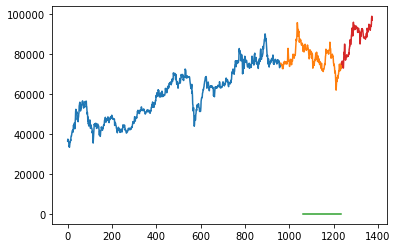

In [28]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()